In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
print(cv2.__version__)

4.11.0


In [6]:
import matplotlib.pyplot as plt

In [12]:
image=cv2.imread(r"Screenshot(100).png")
                 

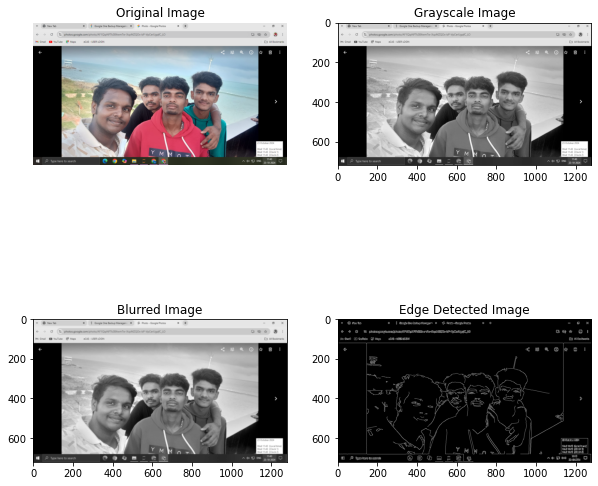

In [15]:
if image is None:
    print("error: Image not found!")
else:
    image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    axs[0, 0].imshow(image_rgb)
    axs[0, 0].set_title("Original Image")
    axs[0, 1].imshow(gray, cmap="gray")
    axs[0, 1].set_title("Grayscale Image")

    axs[1, 0].imshow(blurred, cmap="gray")
    axs[1, 0].set_title("Blurred Image")

    axs[1, 1].imshow(edges, cmap="gray")
    axs[1, 1].set_title("Edge Detected Image")
for ax in axs.flat:
    ax.axis("off")
    plt.show()

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

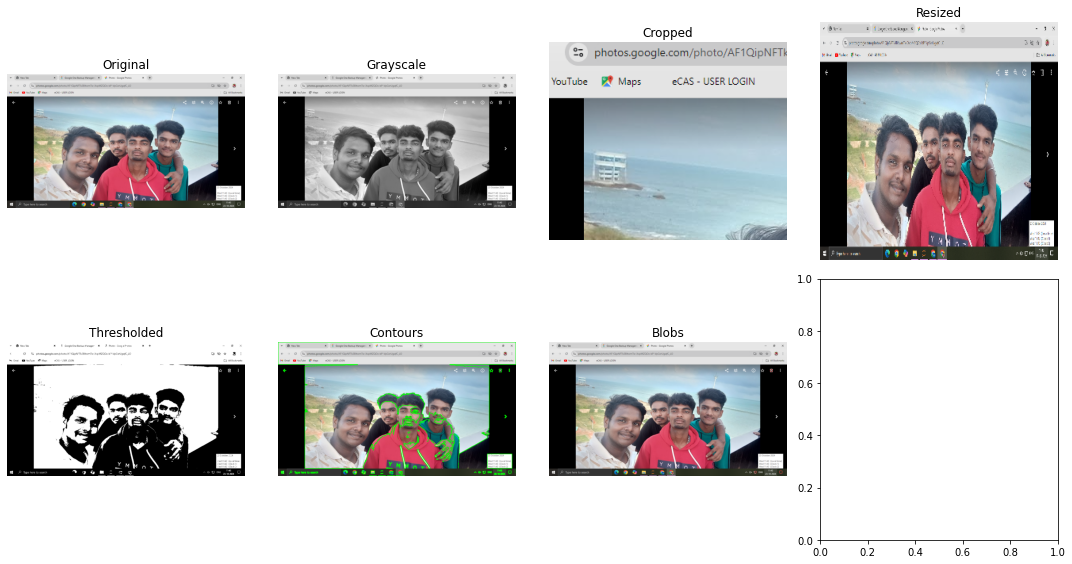

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("Screenshot(100).png")
if image is None:
    print("Error: Image not found!")
    exit()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cropped = image[50:300, 100:400]
resized = cv2.resize(image, (300, 300))
_, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 100
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(thresholded)
blob_image = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
titles = ["Original", "Grayscale", "Cropped", "Resized", "Thresholded", "Contours", "Blobs"]
images = [image, gray, cropped, resized, thresholded, contour_image, blob_image]
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i, ax in enumerate(axs.flat[:7]):
    cmap = "gray" if len(images[i].shape) == 2 else None
    ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB), cmap=cmap)
    ax.set_title(titles[i])
    ax.axis("off")
plt.tight_layout()
plt.show()


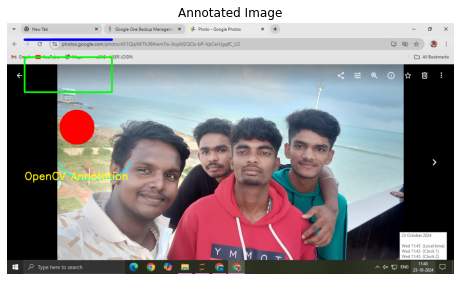

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("Screenshot(100).png") 
if image is None:
    print("Error: Image not found!")
    exit()
cv2.line(image, (50, 50), (300, 50), (255, 0, 0), 5)
cv2.rectangle(image, (50, 100), (300, 200), (0, 255, 0), 3)
cv2.circle(image, (200, 300), 50, (0, 0, 255), -1)
cv2.ellipse(image, (250, 400), (100, 50), 0, 0, 180, (255, 255, 0), 2)
cv2.putText(image, "OpenCV Annotation", (50, 450), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Annotated Image")
plt.show()
